In [1]:
import tensorflow as tf
import keras
from keras.layers import MaxPooling2D,Convolution2D,UpSampling2D,Input
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [3]:
input = Input(shape=(28,28,1),name='input')
#encoder
x = Convolution2D(16,kernel_size=(3,3),padding='same',activation='relu',name='conv1')(input)
x = MaxPooling2D(pool_size=(2,2),padding='same')(x)
x = Convolution2D(8,kernel_size=(3,3),padding='same',activation='relu',name='conv2')(x)
x = MaxPooling2D(pool_size=(2,2),padding='same')(x)
x = Convolution2D(8,kernel_size=(3,3),padding='same',activation='relu',name='conv3')(x)
x = MaxPooling2D(pool_size=(2,2),padding='same')(x)
#decoder
x = Convolution2D(8,kernel_size=(3,3),padding='same',activation='relu',name='conv4')(x)
x = UpSampling2D(size=(2,2))(x)
x = Convolution2D(8,kernel_size=(3,3),padding='same',activation='relu',name='conv5')(x)
x = UpSampling2D(size=(2,2))(x)
x = Convolution2D(8,kernel_size=(3,3),activation='relu',name='conv6')(x)
x = UpSampling2D(size=(2,2))(x)

output = Convolution2D(filters=1,kernel_size=(3,1),padding='same',activation='sigmoid',name='output')(x)

model = Model(inputs = input , outputs = output , name='CAE')
model.compile(optimizer='adam',loss='binary_crossentropy')

In [5]:
model.summary()

Model: "CAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0       

In [6]:
model.fit(x_train,x_train,batch_size=32,epochs=50)

Epoch 1/50
60000/60000 [==============================] - 49s 819us/step - loss: 0.1707
Epoch 2/50
60000/60000 [==============================] - 55s 917us/step - loss: 0.1339
Epoch 3/50
60000/60000 [==============================] - 52s 873us/step - loss: 0.1279
Epoch 4/50
60000/60000 [==============================] - 55s 909us/step - loss: 0.1247
Epoch 5/50
60000/60000 [==============================] - 54s 903us/step - loss: 0.1226
Epoch 6/50
60000/60000 [==============================] - 54s 905us/step - loss: 0.1211
Epoch 7/50
60000/60000 [==============================] - 58s 962us/step - loss: 0.1198
Epoch 8/50
60000/60000 [==============================] - 58s 966us/step - loss: 0.1188
Epoch 9/50
60000/60000 [==============================] - 53s 882us/step - loss: 0.1178
Epoch 10/50
60000/60000 [==============================] - 54s 900us/step - loss: 0.1170
Epoch 11/50
60000/60000 [==============================] - 54s 899us/step - loss: 0.1162
Epoch 12/50
60000/60000 [=====

In [7]:
pred = model.predict(x_test)

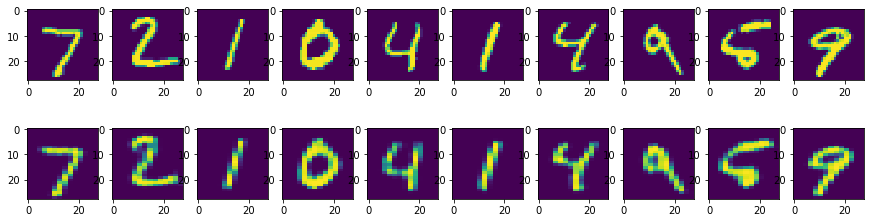

In [10]:
plt.figure(figsize=(15,4))
for i in range(10):
    #original
    ax = plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    #reconstruction
    ax = plt.subplot(2,10,i+1+10)
    plt.imshow(pred[i].reshape(28,28))
plt.show()    